# Initialization (should be hidden)

In [5]:
from __future__ import print_function # py 2.7 compat.
import base64
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets # Widget definitions.
from traitlets import Unicode # Traitlet needed to add synced attributes to the widget.

import matplotlib.pyplot as plt
%matplotlib inline

from temp_codes.data_set import DataSet
from temp_codes.ls_5 import line_source
from temp_codes.widgets import DataSetUploadWidget

In [6]:
%%HTML
<script src="temp_codes/widget.js"></script>

In [7]:
w = DataSetUploadWidget(DataSet); w

Loading agar_data_try.dat


In [8]:
w.data_set

A XXX model with 360 measures

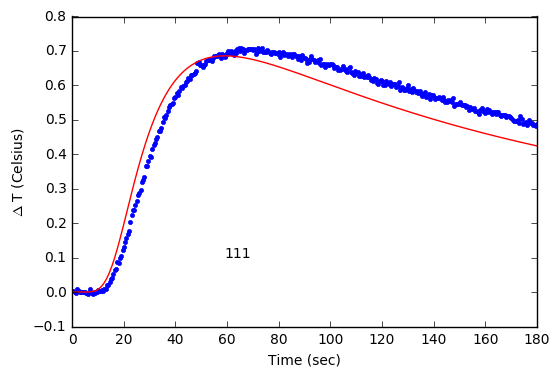

In [9]:
rho_widget=widgets.BoundedFloatText(
    value=1000, min=10, max=10**6, step=1,
    description='rho (xxx/sss)')
t0_widget=widgets.BoundedFloatText(
    value=8, min=1, max=10, step=.1,
    description='t0 (sec)')
@interact()
def line_source_plot(t0: t0_widget, rho: rho_widget):
    model = line_source(w.data_set, t0=t0,rho=rho)
    plt.plot(model.times,w.data_set.temperature_responses,'.')
    plt.plot(model.times,model.fit_temperature_responses,'r')
    plt.xlabel('Time (sec)')
    plt.ylabel('$\Delta$ T (Celsius)')
    plt.text(t0+50,0.1,111)
    plt.show()